##  Abalone Age Prediction 

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
Age               4177 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


In [3]:
def preprocess_and_train(df,target,task):
    df=df.copy()
    # If the sex column is not the target,
    if target != 'Sex':
        dummies = pd.get_dummies(df['Sex'])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop('Sex', axis=1)
        
     # Split target from df
    y = df[target].copy()
    x = df.drop(target, axis=1).copy()
    
    # Train-test split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(x_train)
    
    x_train = pd.DataFrame(scaler.transform(x_train),columns=x.columns)
    x_test = pd.DataFrame(scaler.transform(x_test),columns=x.columns)
    
    # Define model1
    if task == "regression":
        model = LinearRegression()
    elif task == "classification":
        model = LogisticRegression()
    
    # Fit model to train set
    model.fit(x_train,y_train)
    
    #return the test result
    return model.score(x_test,y_test)


## Predicting the Age column

In [2]:
results = preprocess_and_train(data, target='Age', task='regression')
("Age regression R^2: {:.4f}".format(results))



NameError: name 'preprocess_and_train' is not defined

## 1. Download the dataset:Dataset 

      ##  I have downloaded the Dataset

## 2. Load the dataset into the tool

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")

In [2]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [3]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5


## 3. Perform Below Visualizations

## (i) Univariate Analysis 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


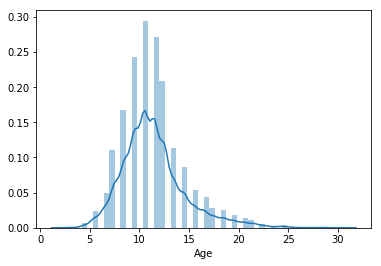

In [4]:
sns.distplot(data['Age'])

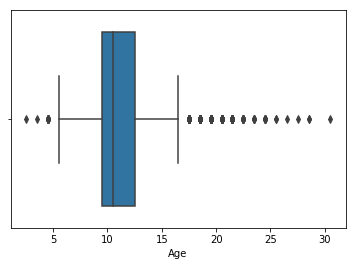

In [10]:
sns.boxplot(data['Age'])

## (ii)Bi-Variate Analysis 

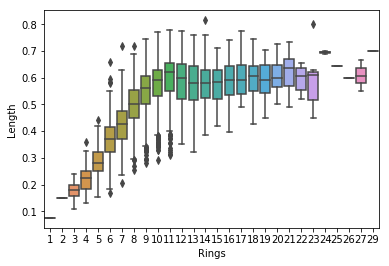

In [8]:
sns.boxplot(data['Rings'], data['Length'])

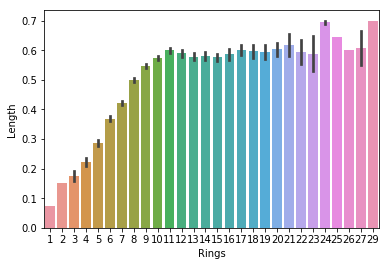

In [11]:
sns.barplot(data['Rings'], data['Length'])

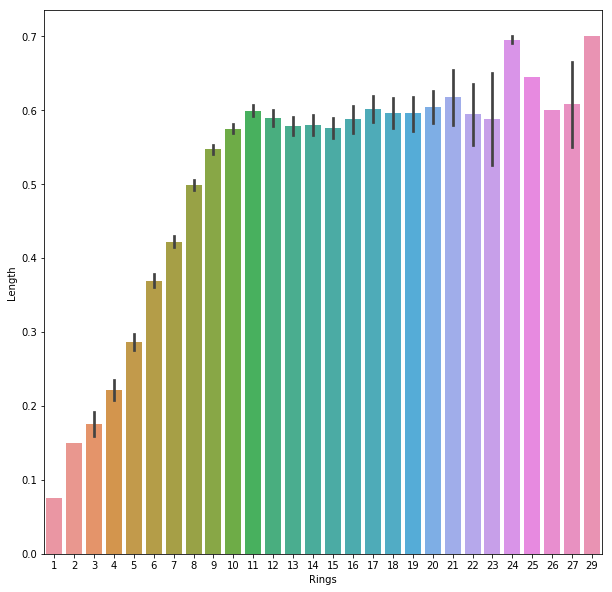

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(data['Rings'], data['Length'])

## (iii) Multi-Variate Analysis 

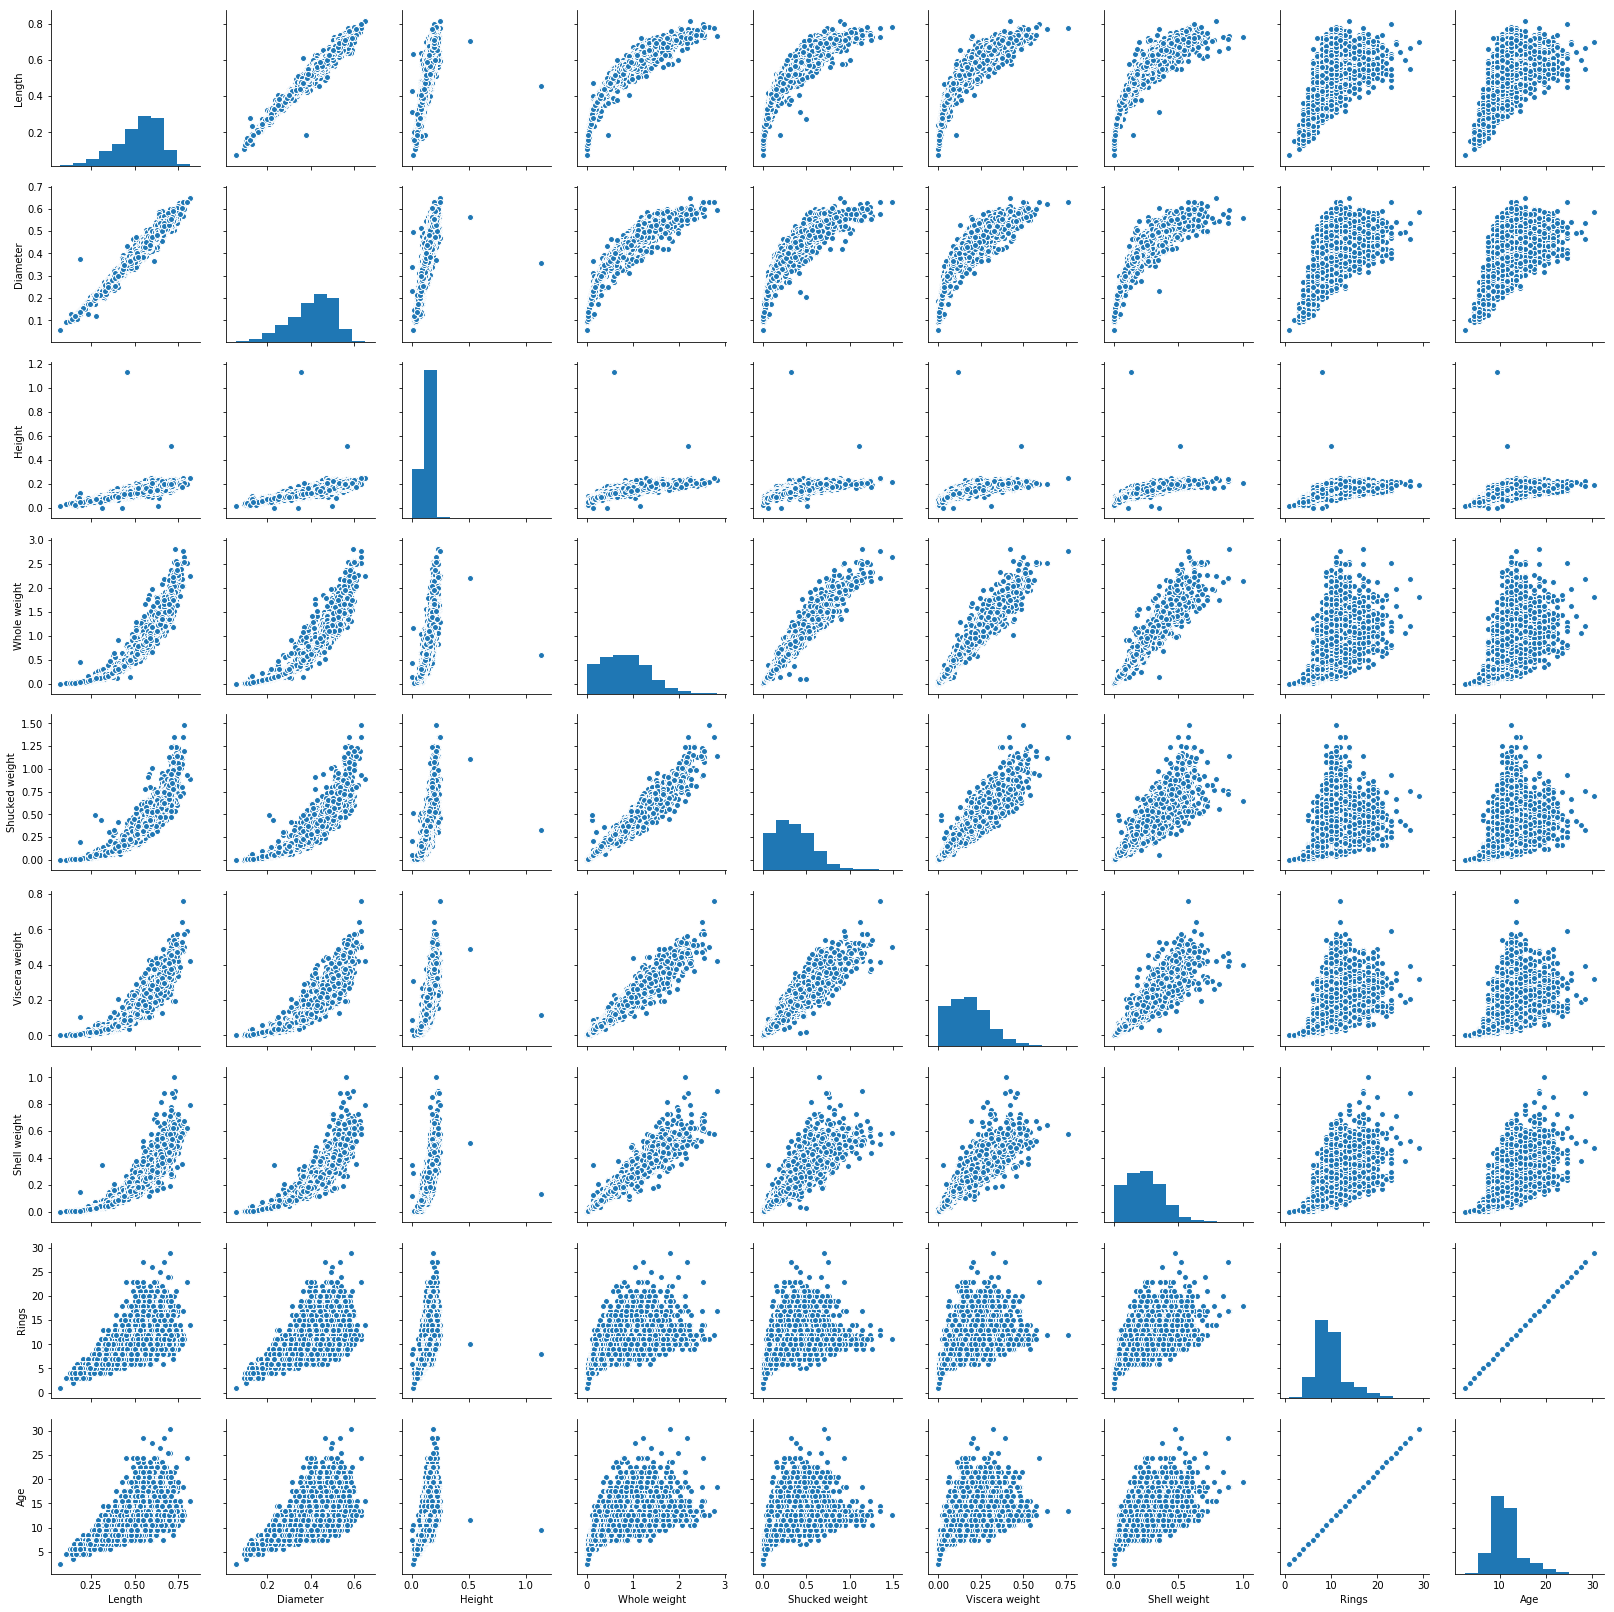

In [13]:
sns.pairplot(data)

In [14]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


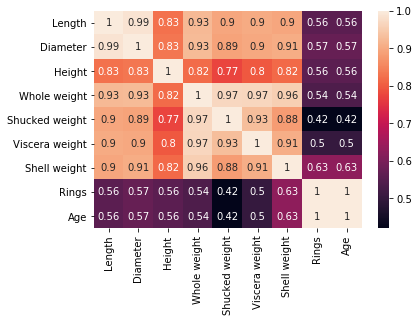

In [15]:
sns.heatmap(data.corr(), annot = True)

## 4. Perform descriptive statistics on the dataset

In [16]:
data.mean()

Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Rings              9.933684
Age               11.433684
dtype: float64

In [17]:
data.median()

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

In [18]:
data.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
Age               10.395266
dtype: float64

In [20]:
data.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
Age               3.224169
dtype: float64

In [21]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [22]:
data['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [24]:
data['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

## 5. Check for Missing values and deal with them

In [25]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

In [26]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

     ## THERE IS NO MISSING VALUES

    ## IF ANY MISSING VALUES THERE WE HAVE TO DO FOLLOWING

In [27]:
data.mean()

Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Rings              9.933684
Age               11.433684
dtype: float64

In [28]:
data.median()

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

In [29]:
data['Age'].mode()

0    10.5
dtype: float64

In [30]:
data['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [31]:
data['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

In [32]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
data['Age'].mode()
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
5        9.5
6       21.5
7       17.5
8       10.5
9       20.5
10      15.5
11      11.5
12      12.5
13      11.5
14      11.5
15      13.5
16       8.5
17      11.5
18       8.5
19      10.5
20      12.5
21      11.5
22      13.5
23      10.5
24      11.5
25      12.5
26      12.5
27      13.5
28      16.5
29      12.5
        ... 
4147    12.5
4148    12.5
4149     7.5
4150     8.5
4151     7.5
4152     8.5
4153     9.5
4154     7.5
4155     7.5
4156     9.5
4157     9.5
4158     9.5
4159    10.5
4160    12.5
4161    12.5
4162     9.5
4163     8.5
4164     8.5
4165     8.5
4166    11.5
4167    10.5
4168     9.5
4169    11.5
4170    11.5
4171     9.5
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [33]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
data['Age'].mean()
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
5        9.5
6       21.5
7       17.5
8       10.5
9       20.5
10      15.5
11      11.5
12      12.5
13      11.5
14      11.5
15      13.5
16       8.5
17      11.5
18       8.5
19      10.5
20      12.5
21      11.5
22      13.5
23      10.5
24      11.5
25      12.5
26      12.5
27      13.5
28      16.5
29      12.5
        ... 
4147    12.5
4148    12.5
4149     7.5
4150     8.5
4151     7.5
4152     8.5
4153     9.5
4154     7.5
4155     7.5
4156     9.5
4157     9.5
4158     9.5
4159    10.5
4160    12.5
4161    12.5
4162     9.5
4163     8.5
4164     8.5
4165     8.5
4166    11.5
4167    10.5
4168     9.5
4169    11.5
4170    11.5
4171     9.5
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

## 6. Find the outliers and replace them outliers 

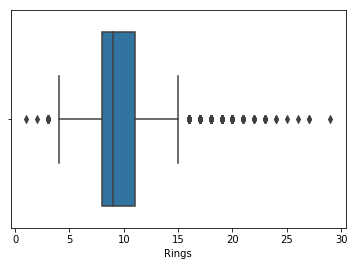

In [3]:
import pandas as pd
import seaborn as sns
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
sns.boxplot(data['Rings'])

In [ ]:
q  = data.quantile([0.80,0.45])
q

In [60]:
iqr =  q.iloc[0] - q.iloc[1]
iqr

Length            0.1000
Diameter          0.0850
Height            0.0400
Whole weight      0.5152
Shucked weight    0.2389
Viscera weight    0.1170
Shell weight      0.1418
Rings             2.0000
Age               5.0000
dtype: float64

In [61]:
u = q.iloc[0] + (1.5*iqr)   
u

Length             0.77500
Diameter           0.62250
Height             0.23500
Whole weight       2.01210
Shucked weight     0.90075
Viscera weight     0.44850
Shell weight       0.56450
Rings             12.00000
Age               17.50000
dtype: float64

In [62]:
l=q.iloc[1] - (1.5*iqr)
l

Length            0.37500
Diameter          0.28250
Height            0.07500
Whole weight     -0.04870
Shucked weight   -0.05485
Viscera weight   -0.01950
Shell weight     -0.00270
Rings             4.00000
Age              -2.50000
dtype: float64

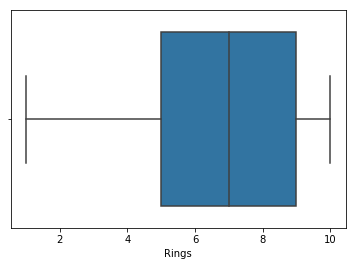

In [68]:
import seaborn as sns
data['Rings'] = np.where(data['Rings']>50, 20, data['Rings'])
sns.boxplot(data['Rings'])

## 7. Check for Categorical columns and perform encoding

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,5,5.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,10.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,5.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,5.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,10.0


In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,5,5.0
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,5.0
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,5.0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,5.0
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,5,5.0


##  8. Split the data into dependent and independent variables

In [71]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
x = data.iloc[0:5, 0:9]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [72]:
y=data['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
5        9.5
6       21.5
7       17.5
8       10.5
9       20.5
10      15.5
11      11.5
12      12.5
13      11.5
14      11.5
15      13.5
16       8.5
17      11.5
18       8.5
19      10.5
20      12.5
21      11.5
22      13.5
23      10.5
24      11.5
25      12.5
26      12.5
27      13.5
28      16.5
29      12.5
        ... 
4147    12.5
4148    12.5
4149     7.5
4150     8.5
4151     7.5
4152     8.5
4153     9.5
4154     7.5
4155     7.5
4156     9.5
4157     9.5
4158     9.5
4159    10.5
4160    12.5
4161    12.5
4162     9.5
4163     8.5
4164     8.5
4165     8.5
4166    11.5
4167    10.5
4168     9.5
4169    11.5
4170    11.5
4171     9.5
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

##  9. Scale the independent variables 

In [78]:
sc = StandardScaler()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()
x = data.iloc[0:5, 0:9]
x_scaled = sc.fit_transform(x)
x_scaled


array([[ 0.75      ,  0.46509931,  0.48627825, -0.47140452,  0.47207184,
         0.68816886,  0.31003838,  0.38147103,  1.83711731],
       [ 0.75      , -0.97123679, -1.08236126, -0.70710678, -1.10241054,
        -1.12662244, -1.03516947, -1.00569634, -0.88453796],
       [-1.75      ,  1.49105366,  1.34902998,  1.41421356,  1.36164075,
         1.15275543,  1.34777015,  1.42184655, -0.20412415],
       [ 0.75      ,  0.25990844,  0.48627825,  0.94280904,  0.4829868 ,
         0.55750389,  0.64313747,  0.46816899,  0.13608276],
       [-0.5       , -1.24482462, -1.23922522, -1.1785113 , -1.21428884,
        -1.27180574, -1.26577653, -1.26579023, -0.88453796]])

In [63]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled = mm.fit_transform(x)

In [64]:
x_scaled

array([[1.        , 0.51351351, 0.5210084 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [1.        , 0.37162162, 0.35294118, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.        , 0.61486486, 0.61344538, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [1.        , 0.70945946, 0.70588235, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.        , 0.74324324, 0.72268908, ..., 0.34298881, 0.29347285,
        0.32142857],
       [1.        , 0.85810811, 0.84033613, ..., 0.49506254, 0.49177877,
        0.39285714]])

## 10. Split the data into training and testing 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import pandas as pd
sc = StandardScaler()
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Dataset\abalone.csv")
le = LabelEncoder()
oneh = OneHotEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
x = data.iloc[:, 0:9]
x_scaled = sc.fit_transform(x)
y=data['Age']
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.1, random_state = 0)
x_train


array([[-1.28068972,  1.50741262,  1.43224458, ...,  2.10678846,
         1.80455743,  0.95115443],
       [-1.28068972,  1.42413379,  1.43224458, ...,  2.01554852,
         1.13279449,  0.02057072],
       [-1.28068972,  0.341509  , -0.07942572, ..., -0.12858999,
        -0.42267798, -0.59981842],
       ...,
       [ 1.15198011,  0.59134549,  0.42446438, ...,  0.23636976,
         0.10539235,  0.02057072],
       [-1.28068972,  0.84118198,  0.82757646, ...,  0.51008957,
         0.57239333, -0.28962385],
       [-0.0643548 , -0.94931287, -0.83526087, ..., -0.96343541,
        -0.99026378, -0.59981842]])

In [10]:
x_train.shape

(3759, 9)

In [11]:
x_test

array([[ 1.15198011,  0.21659075,  0.17251933, ...,  0.56939553,
         0.69093973,  0.95115443],
       [-0.0643548 , -0.1998034 , -0.07942572, ..., -0.34300384,
        -0.32568547, -0.59981842],
       [ 1.15198011,  0.79954256,  0.72679844, ...,  1.7646387 ,
         0.56520869,  0.33076529],
       ...,
       [-0.0643548 ,  0.341509  ,  0.22290834, ..., -0.110342  ,
         0.36763136,  0.33076529],
       [-0.0643548 ,  0.46642724,  0.37407537, ...,  0.32760969,
         0.54724712,  3.12251641],
       [ 1.15198011,  0.67462432,  0.62602042, ...,  0.54658554,
         0.76278603,  0.64095986]])

In [12]:
x_test.shape

(418, 9)

In [13]:
y_train

34      14.5
1818    11.5
983      9.5
1119    11.5
453     12.5
1953    10.5
1992     6.5
1332    11.5
4126    12.5
1509    12.5
3194    13.5
599     17.5
3556    10.5
3595    12.5
961     10.5
3844    15.5
638     15.5
562     12.5
3075    12.5
3163    10.5
352     13.5
4092    12.5
1835     8.5
2715     7.5
3858    13.5
2330    10.5
2004     8.5
1236     7.5
2406    11.5
3428     5.5
        ... 
2292    10.5
714     10.5
544     11.5
2745     9.5
3337    16.5
423      9.5
3219    17.5
659     12.5
797     10.5
755     14.5
2008     8.5
99      11.5
2496    16.5
1871    10.5
2046     8.5
2163    10.5
2893     9.5
537      8.5
1701    11.5
2897    11.5
2222    14.5
2135    13.5
2599     9.5
705     11.5
3468    12.5
1033    11.5
3264    13.5
1653    11.5
2607    10.5
2732     9.5
Name: Age, Length: 3759, dtype: float64

In [14]:
y_train.shape

(3759,)

In [15]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
1399    12.5
2054     8.5
2058     9.5
217      8.5
1931    10.5
1571     9.5
3379     9.5
569     12.5
3155    10.5
1430     5.5
991      8.5
4120     8.5
2211    18.5
1675     8.5
2640     8.5
45       8.5
1432     6.5
4122     9.5
2439    10.5
576     11.5
87      11.5
2381     6.5
3242    16.5
1328    11.5
748     15.5
        ... 
1077     8.5
248      8.5
170     15.5
1651     9.5
308     15.5
3265    15.5
3151    22.5
1248     9.5
2950    12.5
1775     9.5
1895    12.5
2101    20.5
3540     9.5
3497    10.5
914      8.5
4021    11.5
3157    10.5
2704    11.5
517      6.5
582     20.5
3857    17.5
841     10.5
690     11.5
2743     8.5
2703    12.5
3326    13.5
3877    16.5
2769    12.5
3359    21.5
104     13.5
Name: Age, Length: 418, dtype: float64

In [16]:
y_test.shape

(418,)

## 11. Build the Model 

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 12. Train the Model 

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.1, random_state = 0)
x_train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 13. Test the Model

In [67]:
pred_test = lr.predict(x_test)
pred_test

array([14.5,  9.5, 12.5,  6.5, 13.5, 12.5,  8.5,  9.5,  8.5, 10.5,  9.5,
        9.5, 12.5, 10.5,  5.5,  8.5,  8.5, 18.5,  8.5,  8.5,  8.5,  6.5,
        9.5, 10.5, 11.5, 11.5,  6.5, 16.5, 11.5, 15.5,  9.5,  5.5, 10.5,
       14.5,  8.5,  8.5,  9.5, 10.5,  9.5, 12.5, 16.5, 13.5, 18.5, 17.5,
       12.5, 12.5,  9.5, 11.5, 12.5,  7.5, 14.5,  8.5, 14.5, 21.5, 13.5,
        8.5,  9.5, 11.5,  8.5,  8.5, 10.5, 10.5, 12.5,  9.5,  8.5, 13.5,
       14.5, 18.5,  9.5, 13.5, 10.5, 18.5, 11.5,  7.5, 12.5,  9.5,  9.5,
       10.5,  9.5,  9.5,  9.5,  7.5,  8.5, 14.5, 12.5,  7.5, 10.5, 13.5,
        6.5,  7.5, 12.5, 12.5,  9.5,  8.5, 17.5,  9.5, 12.5,  9.5, 19.5,
       12.5, 13.5, 15.5, 13.5, 12.5,  7.5, 10.5,  8.5,  7.5, 12.5, 12.5,
       12.5, 13.5, 21.5, 11.5, 15.5, 11.5, 11.5, 13.5,  5.5, 13.5,  8.5,
       14.5,  7.5,  9.5, 18.5, 16.5, 10.5, 12.5,  8.5, 12.5,  9.5,  8.5,
        8.5, 11.5, 12.5, 10.5, 11.5, 10.5,  9.5, 17.5, 17.5, 14.5,  7.5,
       10.5, 11.5, 10.5,  9.5,  9.5,  9.5,  6.5,  9

In [68]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
1399    12.5
2054     8.5
2058     9.5
217      8.5
1931    10.5
1571     9.5
3379     9.5
569     12.5
3155    10.5
1430     5.5
991      8.5
4120     8.5
2211    18.5
1675     8.5
2640     8.5
45       8.5
1432     6.5
4122     9.5
2439    10.5
576     11.5
87      11.5
2381     6.5
3242    16.5
1328    11.5
748     15.5
        ... 
1077     8.5
248      8.5
170     15.5
1651     9.5
308     15.5
3265    15.5
3151    22.5
1248     9.5
2950    12.5
1775     9.5
1895    12.5
2101    20.5
3540     9.5
3497    10.5
914      8.5
4021    11.5
3157    10.5
2704    11.5
517      6.5
582     20.5
3857    17.5
841     10.5
690     11.5
2743     8.5
2703    12.5
3326    13.5
3877    16.5
2769    12.5
3359    21.5
104     13.5
Name: Age, Length: 418, dtype: float64

## 14. Measure the performance using Metrics

    ## EVALUATION METRICS, FIND THE ACCURACY

In [20]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

1.0

        ## EVALUATION METRICS

## (i)MSE

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred_test,y_test)

In [71]:
mse

1.067681716221628e-27

## (ii) RMSE

In [72]:
rmse = np.sqrt(mse)

In [73]:
rmse

3.267539925114348e-14

## (iii)R2 score

In [74]:
r2_score(pred_test,y_test)

1.0

## (iv)MAE

In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred_test,y_test)

In [77]:
mae

3.257999930445459e-14